# 逻辑回归中添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = np.random.uniform(0, 3, 100)
theta = np.random.uniform(0, 2 * np.pi, 100)
X = np.c_[r * np.cos(theta), r * np.sin(theta)]
y = np.array(X[:, 0] ** 2 - X[:, 1] ** 2 + 2 * X[:, 0] * X[:, 1] < 0.2, dtype=int)

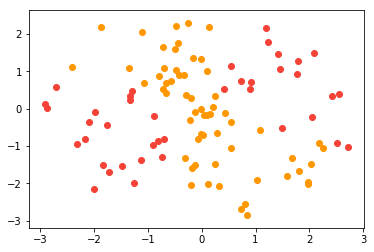

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [4]:
def plot_decision_boundary(algo, axis):
    
    x0 = np.linspace(axis[0], axis[1], int(100 * (axis[1]-axis[0])))
    x1 = np.linspace(axis[2], axis[3], int(100 * (axis[3]-axis[2])))
    x0, x1 = np.meshgrid(x0, x1)
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = algo.predict(X_new)
    z = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#f9a19a", "#ffcb7f"])
    
    plt.contourf(x0, x1, z, linewidth=5, cmap=custom_map)

#### 使用逻辑回归

0.62


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


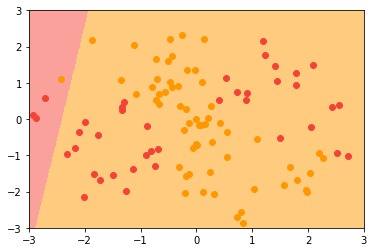

In [5]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
print(log_reg.score(X, y))

plot_decision_boundary(log_reg, [-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.axis([-3, 3, -3, 3])
plt.show()

#### 使用多项式特征

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

0.96


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


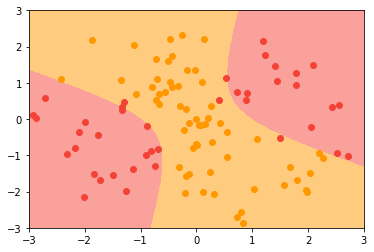

In [7]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)
print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, [-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.axis([-3, 3, -3, 3])
plt.show()

0.96


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


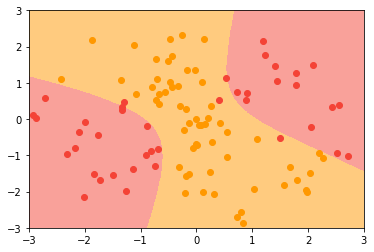

In [8]:
poly_log_reg = PolynomialLogisticRegression(degree=3)
poly_log_reg.fit(X, y)
print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, [-3, 3, -3, 3])
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.axis([-3, 3, -3, 3])
plt.show()